# Dimuon spectrum

This code is a columnar adaptation of [a ROOT tutorial](https://root.cern.ch/doc/master/df102__NanoAODDimuonAnalysis_8py.html) showcasing the awkward array toolset, and utilizing FCAT histograms.

In [1]:
import time
import uproot
import uproot_methods
import awkward

%matplotlib inline
from coffea import hist

In [14]:
tstart = time.time()

files = [
    'data/BNB_CRT.root',
]

crt_time_hist = hist.Hist("Counts", hist.Bin("hit_time", r"$time$ [ns]",100,0,20000))
#                hist.Hist("Counts", hist.Bin("mass", r"$m_{\mu\mu}$ [GeV]", 30000, 0.25, 300))
events = uproot.open(files[0])["crtveto/_tree"]


In [6]:
branches = ['_run']
events.keys()

['_run',
 '_subrun',
 '_event',
 '_nflashes_in_beamgate',
 '_nflashes_in_beamgate_passing_beamspill_and_PE_cuts',
 '_beam_flash_time',
 '_beam_flash_PE',
 '_nCRThits_in_event',
 '_CRT_hit_time',
 '_CRT_hit_PE',
 '_CRT_hit_x',
 '_CRT_hit_y',
 '_CRT_hit_z',
 'CRT_hits_time',
 'CRT_hits_PE',
 'CRT_hits_x',
 'CRT_hits_y',
 'CRT_hits_z',
 '_nu_e',
 '_nu_ccnc',
 '_nu_vtx_x',
 '_nu_vtx_y',
 '_nu_vtx_z',
 '_dt',
 '_within_resolution',
 '_above_CRT_threshold']

In [29]:
tstart = time.time()

branches = ['_run', '_subrun', '_event','_CRT_hit_time']
for chunk in uproot.iterate(files, 'crtveto/_tree', branches=branches, entrysteps=10000, namedecode='ascii'):
    run = chunk.pop('_run')
    #hit_time = chunk.pop('_CRT_hit_time')
#    print hit_time
    crt_time_hist.fill(hit_time=chunk.pop('_CRT_hit_time'))
    
elapsed = time.time() - tstart

(0.1, 1000000.0)

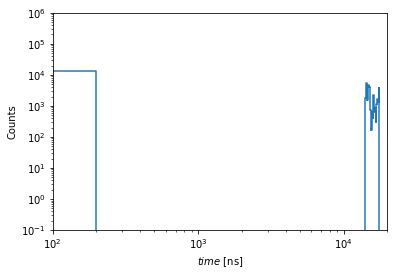

In [30]:
fig, ax, _ = hist.plot1d(crt_time_hist)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(0.1, 1e6)

In [31]:
print("Events/s:", crt_time_hist.values()[()].sum()/elapsed)

('Events/s:', 140999.01436757424)
